# **APPL**

## **Import Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import sys


In [2]:
sys.path.append(os.path.abspath(os.path.join('..')))

### **Load data**

In [ ]:
from scripts.RawAnalysis import RawAnalysis
from scripts.QuantitativeAnalysis import QuantivativeAnalysis
analyzer = RawAnalysis()
quantitative_analysis =  QuantivativeAnalysis()

df_AAPL = analyzer.load_data('../data/AAPL_historical_data.csv')
df_AMZN = analyzer.load_data('../data/AMZN_historical_data.csv')
df_GOOG = analyzer.load_data('../data/GOOG_historical_data.csv')
df_META = analyzer.load_data('../data/META_historical_data.csv')
df_MSFT = analyzer.load_data('../data/MSFT_historical_data.csv')
df_NVDA = analyzer.load_data('../data/NVDA_historical_data.csv')
df_TSLA = analyzer.load_data('../data/TSLA_historical_data.csv')
df_news = analyzer.load_data('../data/raw_analyst_ratings.csv')

In [4]:
# Stock data dictionary
stock_dfs = {
    'AAPL': df_AAPL,
    'AMZN': df_AMZN,
    'GOOG': df_GOOG,
    'META': df_META,
    'MSFT': df_MSFT,
    'NVDA': df_NVDA,
    'TSLA': df_TSLA
}

# Merge all stock data
merged_stocks = quantitative_analysis.merge_all_stocks(stock_dfs)

Combined stock data shape: (45428, 10)


In [5]:
merged_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,ticker
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL


In [6]:
# Ensure 'Date' is datetime
merged_stocks['Date'] = pd.to_datetime(merged_stocks['Date'])

# Calculate SMA 20 using pandas_ta on the DataFrame, not the Series
merged_stocks['SMA_20'] = merged_stocks.ta.sma(length=20)

# Plot the result
quantitative_analysis.plot_sma(merged_stocks)

AttributeError: 'DataFrame' object has no attribute 'ta'

### **Discriptive Statistics**

In [ ]:
df_AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [ ]:
df_AMZN.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


In [ ]:
df_GOOG.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0


In [ ]:
df_META.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0


In [ ]:
df_MSFT.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0


In [ ]:
df_NVDA.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0


In [ ]:
df_TSLA.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


In [ ]:
df_AAPL.shape

(10998, 9)

In [ ]:
df_AMZN.shape

(6846, 9)

In [ ]:
df_GOOG.shape

(5020, 9)

In [ ]:
df_META.shape

(2926, 9)

In [ ]:
df_MSFT.shape

(9672, 9)

In [ ]:
df_NVDA.shape

(6421, 9)

In [ ]:
df_TSLA.shape

(3545, 9)

In [ ]:
# Count of missing values
df_AAPL.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

### **Date Format**

In [ ]:
df_news['date'] = pd.to_datetime(df_news['date'], errors='coerce')
df_AAPL['date'] = pd.to_datetime(df_AAPL['Date'],errors='coerce')


### **Merge**

In [ ]:
df_AAPL['stock'] = 'AAPL'
df_news['date'] = pd.to_datetime(df_news['date']).dt.tz_localize(None)
df_AAPL['Date'] = pd.to_datetime(df_AAPL['Date'])  
df_news['date_only'] = df_news['date'].dt.date
df_AAPL['date_only'] = df_AAPL['Date'].dt.date
df_merged = pd.merge(df_news, df_AAPL, how='inner', on=['date_only', 'stock'])

In [ ]:
df_merged.shape

(10, 17)

In [ ]:
df_merged['next_close'] = df_merged.groupby('stock')['Close'].shift(-1)
df_merged['price_change'] = df_merged['next_close'] - df_merged['Close']
df_merged['percent_change'] = df_merged['price_change'] / df_merged['Close'] * 100
df_merged['movement'] = df_merged['price_change'].apply(lambda x: 'Up' if x > 0 else 'Down')

In [ ]:
df_merged.shape

(10, 21)

### **Time Series Analysis**

In [ ]:
# Ensure 'date' column is a proper datetime index
df_merged['date'] = pd.to_datetime(df_merged['Date'])  # full timestamp
df_merged.set_index('date', inplace=True)

# Optional: sort by date
df_merged.sort_index(inplace=True)

### ***Plot Stock Price Over Time***

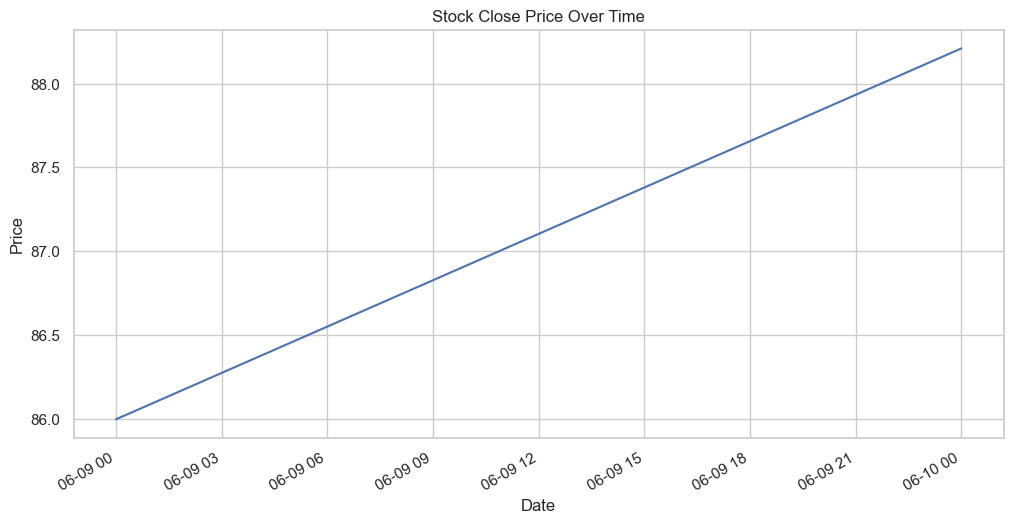

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
df_merged['Close'].plot(title='Stock Close Price Over Time')
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid(True)
plt.show()


#### **Analyze Daily/Weekly/Monthly Trends**

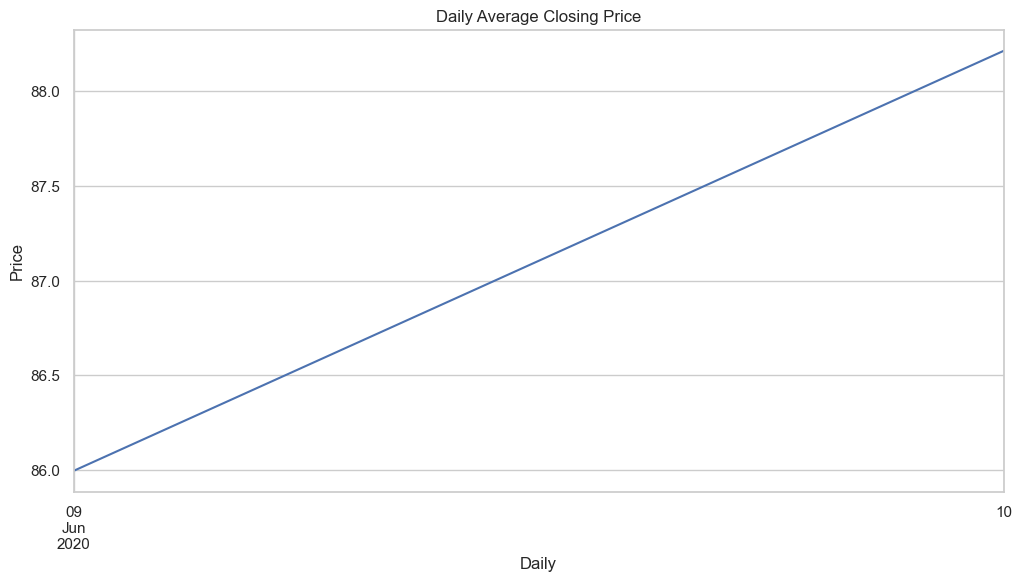

c:\Users\girmachew\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


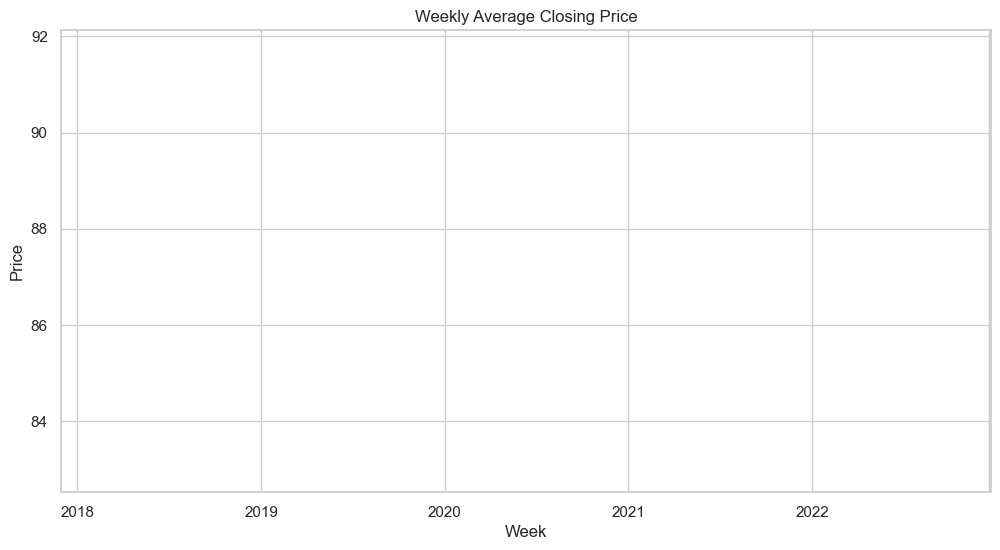

c:\Users\girmachew\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


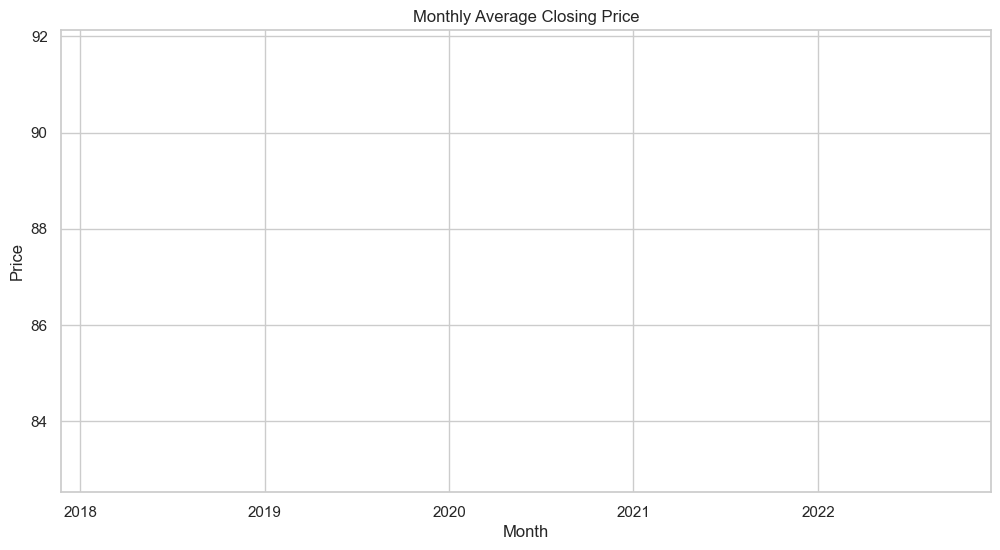

In [ ]:
# Daily mean price
daily_avg = df_merged['Close'].resample('D').mean()
daily_avg = daily_avg.dropna()
# Weekly trend
weekly_avg = df_merged['Close'].resample('W').mean()
weekly_avg = weekly_avg.dropna()

# Monthly trend
monthly_avg = df_merged['Close'].resample('ME').mean()
monthly_avg = monthly_avg.dropna()
# Plot Daily trend
daily_avg.plot(figsize=(12,6), title='Daily Average Closing Price')
plt.ylabel('Price')
plt.xlabel('Daily')
plt.grid(True)
plt.show()
# Plot weekly trend
weekly_avg.plot(figsize=(12,6), title='Weekly Average Closing Price')
plt.ylabel('Price')
plt.xlabel('Week')
plt.grid(True)
plt.show()

# Plot monthly trend
monthly_avg.plot(figsize=(12,6), title='Monthly Average Closing Price')
plt.ylabel('Price')
plt.xlabel('Month')
plt.grid(True)
plt.show()